In [1]:
import math
import os
import random

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn

%matplotlib inline

In [2]:
sklearn.__version__

'0.17.1'

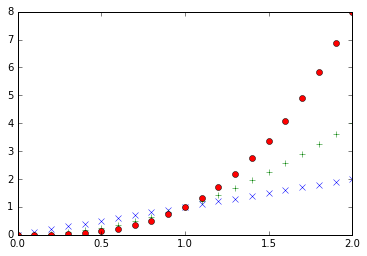

In [3]:
def generate_data(step):
    df = pd.DataFrame(columns=('x', 'x2', 'x3'))
    for i, x in enumerate(np.arange(0, 2.0 + 0.5 * step, step)):
        df.loc[i] = [x, x * x, x * x * x]
    return df

df = generate_data(0.1)
plt.plot(df['x'], df['x'], 'x')
plt.plot(df['x'], df['x2'], '+')
plt.plot(df['x'], df['x3'], 'o')
plt.show()

# Linear Regression
- [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

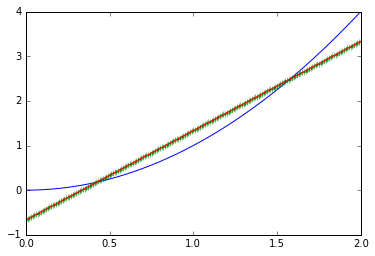

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[['x']], df['x2'])

plt.plot(df['x'], df['x2'])
plt.plot(df['x'], lr.predict(df[['x']]), '+')

# Learned parameters are stored in coef_ and intercept_.
assert len(lr.coef_) == 1
def line(x):
    return lr.coef_[0] * x + lr.intercept_
plt.plot([df['x'].min(), df['x'].max()],
         [line(df['x'].min()), line(df['x'].max())])

plt.show()

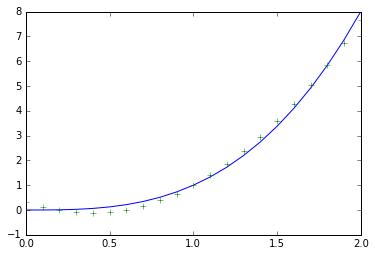

[('x', -2.3419999999999996), ('x2', 3.0)]

In [5]:
lr = LinearRegression()
lr.fit(df[['x', 'x2']], df['x3'])

plt.plot(df['x'], df['x3'])
plt.plot(df['x'], lr.predict(df[['x', 'x2']]), '+')
plt.show()

zip(df[['x', 'x2']].columns, lr.coef_)

# Classification
- [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [Precision-Recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def probability(x, y):
    z = 3 * x - 5 * y + 2
    return 1.0 / (1 + math.exp(-1.0 * z))

df = pd.DataFrame(np.random.uniform(-1, 1, size=[10000, 2]), columns=('x', 'y'))
df['label'] = df.apply(lambda r: random.random() < probability(r['x'], r['y']), axis=1)

In [32]:
classifier = LogisticRegression()
classifier.fit(df[['x', 'y']], df['label'])

print classifier.coef_, classifier.intercept_

[[ 2.87717182 -4.80101998]] [ 1.87374386]


AUC: 0.939278583529


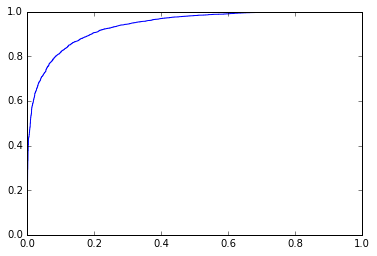

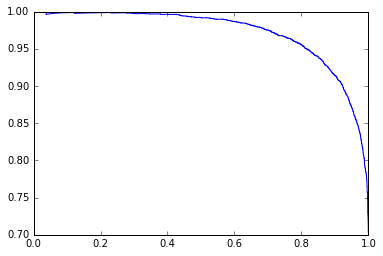

In [41]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(df['label'], classifier.decision_function(df[['x', 'y']]))
print 'AUC:', auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.show()

# Recall-coverage curve
precision, recall, _ = precision_recall_curve(df['label'], classifier.decision_function(df[['x', 'y']]))
plt.plot(recall, precision)
plt.show()

# Random Forests
- [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

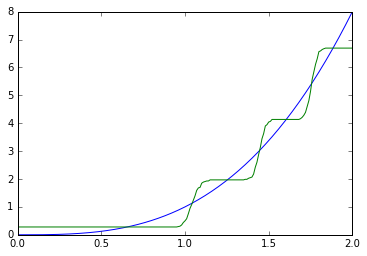

In [42]:
from sklearn.ensemble import RandomForestRegressor

df = generate_data(0.01)

rfr = RandomForestRegressor(n_estimators=100, max_depth=2)
rfr.fit(df[['x']], df['x3'])

plt.plot(df['x'], df['x3'])
plt.plot(df['x'], rfr.predict(df[['x']]))
plt.show()